In [363]:
import numpy as np
import pandas as pd
import sklearn as skl

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

**Основное задание**

In [364]:
train_sample_size = 100

cov = np.random.rand(3, 3)
cov = np.dot(cov, cov.transpose())
mean = np.random.rand(3) + 2

In [365]:
sample = np.random.multivariate_normal(mean, cov, train_sample_size)

In [366]:
test_object = np.random.multivariate_normal(mean, cov, 1)[0]

In [367]:
train_x = sample[:,[1, 2]]
train_y = sample[:,0]

In [368]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(train_x, train_y)
f"Коэффициенты модели: {reg.intercept_, *reg.coef_}"

'Коэффициенты модели: (2.9250243571928656, -1.3945377413643198, 1.637775339589693)'

In [369]:
residuals = reg.predict(train_x) - train_y
print("МО остатка =", residuals.mean())
print("Дисперсия остатка =", residuals.var())

МО остатка = -3.61932706027801e-16
Дисперсия остатка = 0.09034429020287263


Для отдельно сохраненного вектора, по компонентам x2 и x3, используя модель линейной
регрессии, спрогнозировать компоненту x1. Найти квадрат разности точного значения этой
компоненты и прогноза (квадрат ошибки).

In [370]:
(reg.predict(np.array([test_object[1], test_object[2]]).reshape(1, -1)) - test_object[0]) ** 2

array([0.06979165])

Повторить шаги 1-4 M = 100 раз. На каждой итерации на первом шаге использовать одни и те
же параметры. Насколько «хорошо» прогнозируется значение x1. Усреднить квадрат ошибки
(получим среднеквадратичную ошибку прогнозирования). Сделать выводы.

In [371]:
def mean_sqr_error(sample, test_object, model):
    total_sqr_error = 0
    for i in range(100):
        test_ind = int(np.random.rand() * 99)
        cpy = np.array(test_object)
        test_object = np.array(sample[test_ind])
        sample[test_ind] = cpy
        model.fit(sample[:,[1, 2]], sample[:,0])
        total_sqr_error += (model.predict(np.array([test_object[1], test_object[2]]).reshape(1, -1)) - test_object[0]) ** 2
    return total_sqr_error / 100

In [372]:
mean_sqr_error(sample, test_object, reg)

array([0.07326412])

**Дополнительные задания**

Разное

**(+1 балл) Найти истинные коэффициенты регрессии модели из пункта 3, сравнить
полученные результаты.**

In [373]:
expanded_train_x = np.hstack((np.ones(train_sample_size).reshape((train_sample_size, 1)), sample[:,[1, 2]]))
train_y = sample[:,0]
np.linalg.inv(expanded_train_x.transpose() @ expanded_train_x) @ expanded_train_x.transpose() @ train_y

array([ 2.8975292 , -1.36926971,  1.61778592])

Коэффициенты очень близки друг к другу

In [374]:
cov[1, 0] / cov[1, 1], cov[0, 2] / cov[1, 1], mean[0] - mean[1] * cov[1, 0] / cov[1, 1] - mean[2] * cov[0, 2] / cov[1, 1]

(0.6617767515845644, 0.8924474113357951, -1.2560849797257243)

In [375]:
reg.fit(sample[:,[1, 2]], train_y)
f"Коэффициенты модели: {reg.intercept_, *reg.coef_}"

'Коэффициенты модели: (2.8975292023495927, -1.3692697130859892, 1.6177859171101683)'

Истинные результаты совпадают с построенными, значит линейная модель была построена верно

**Решрессия без свободного члена**

In [376]:
reg = LinearRegression(fit_intercept=False)
reg.fit(train_x, train_y)
f"коэффициенты модели: {reg.intercept_, *reg.coef_}"

'коэффициенты модели: (0.0, 1.853436172036656, -1.2705391847019107)'

In [377]:
residuals = reg.predict(train_x) - train_y
print("МО остатка: ", residuals.mean())
print("Дисперсия остатка: ", residuals.var())

МО остатка:  -0.011643811751505338
Дисперсия остатка:  0.2729743268772094


In [378]:
mean_sqr_error(sample, test_object, reg)

array([0.12457018])

****Графики****

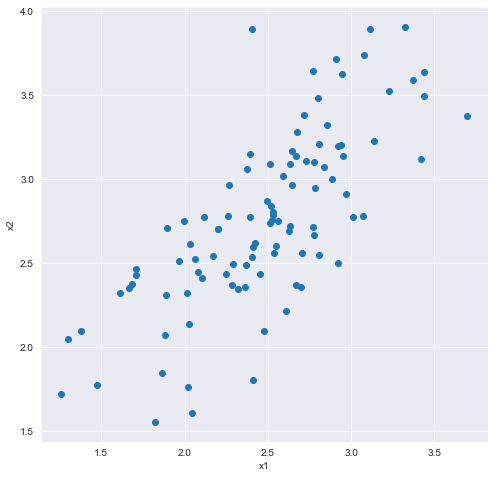

In [379]:
plt.scatter(sample[:,0], sample[:,1])
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [380]:
reg = LinearRegression()
reg.fit(sample[:,1].reshape(-1, 1), sample[:,0])
grid_x2 = np.linspace(sample[:,1].min() - 1, sample[:,1].max() + 1, 100)
predicted_x1 = reg.predict(grid_x2.reshape(-1, 1))

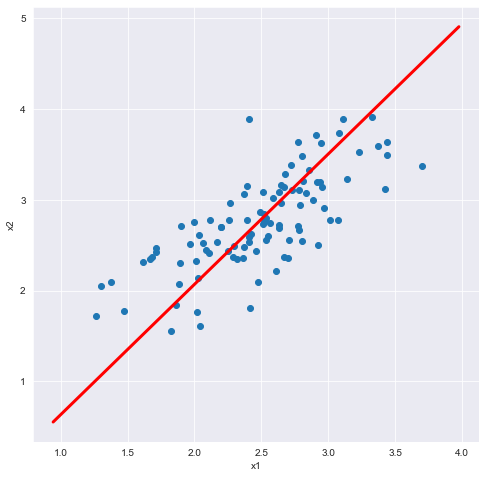

In [381]:
plt.plot(predicted_x1, grid_x2, color="red", linewidth=3)
plt.scatter(sample[:,0], sample[:,1])
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

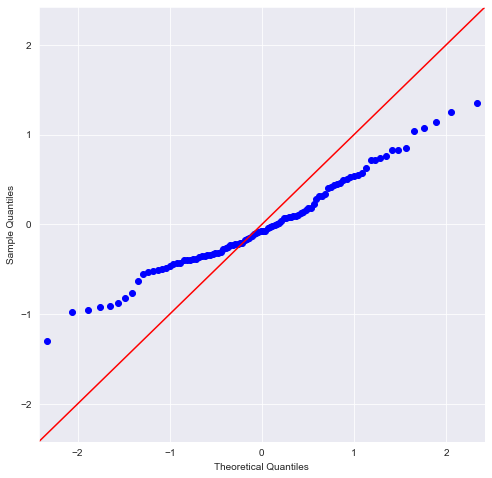

In [382]:
import numpy as np
import statsmodels.api as sm
import pylab as py
   
sm.qqplot(residuals, line ='45')
py.show()

**Хи-квадрат критерий Пирсона**

In [383]:
import scipy.stats as stats

In [384]:
def chi_squared_test(sample, k):
    beg = -6
    end = 6
    step = (end - beg) / k
    sample_probs = [
        sample[np.logical_and(sample >= beg + i * step,
                              sample < beg + (i + 1) * step)].size / sample.size for i in range(k)]
    expected_probs =\
    [stats.norm.cdf(beg + (i + 1) * step) - stats.norm.cdf(beg + i * step) for i in range(k)]
    chi2 = 0
    for i in range(k):
        chi2 += (sample_probs[i] - expected_probs[i]) ** 2 / expected_probs[i]
    chi2 *= sample.size
    
    return 1 - stats.chi2.cdf(chi2, k - 1)

In [385]:
def builtin_chi2(sample, k):
    beg = -6
    end = 6
    step = (end - beg) / k
    sample_probs = [
        sample[np.logical_and(sample >= beg + i * step,
                              sample < beg + (i + 1) * step)].size for i in range(k)]
    expected_probs =\
    [sample.size * (stats.norm.cdf(beg + (i + 1) * step) - stats.norm.cdf(beg + i * step)) for i in range(k)]
    return stats.chisquare(sample_probs, expected_probs)

In [386]:
chi_squared_test(residuals, 50)

0.24486798310776525

In [387]:
builtin_chi2(residuals, 50)

Power_divergenceResult(statistic=55.439834778980654, pvalue=0.24486798310776517)

In [388]:
for k in range(3, 51):
    if (chi_squared_test(residuals, k) < 0.05):
        print(f"for k = {k} p-value = {chi_squared_test(residuals, k)}")

for k = 5 p-value = 0.0001485916362049533
for k = 7 p-value = 9.002753220133108e-06
for k = 8 p-value = 0.01686170597200476
for k = 9 p-value = 6.506493122171442e-06
for k = 10 p-value = 0.0031068618356272504
for k = 11 p-value = 1.3714700231037824e-07
for k = 12 p-value = 0.0002392677254916542
for k = 13 p-value = 2.6146499581436444e-05
for k = 14 p-value = 0.0005657056281843653
for k = 15 p-value = 0.0004764407941240112
for k = 16 p-value = 0.0008533126155129134
for k = 17 p-value = 0.0009480268184792751
for k = 18 p-value = 0.00016801136108168802
for k = 19 p-value = 0.005436446563250041
for k = 20 p-value = 5.23715136220293e-05
for k = 21 p-value = 0.008098422633374236
for k = 22 p-value = 1.4260413907729586e-05
for k = 23 p-value = 0.00943538906290875
for k = 24 p-value = 0.00038742758800125454
for k = 25 p-value = 0.009512801107262048
for k = 26 p-value = 0.0008204899922581443
for k = 27 p-value = 0.00432847331913111
for k = 28 p-value = 0.002569989773011705
for k = 29 p-value = 

In [362]:
sci.kstest(50)
 

NameError: name 'sci' is not defined